In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pathlib import Path
import os

In [2]:
dataset_path = Path(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time_witherrors.csv")

In [3]:
df_no_outliers = pd.read_csv(dataset_path)

In [4]:
len(df_no_outliers)

820701

In [5]:
df_no_outliers.head()

,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path,error,mean
0,0,1280,-1281,-1281,1807,0,0,2561,0,0,...,0,0,184,0.970498,213,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.190429,0.780068
1,1,168420,-5232,-5232,7505724,5401751,11345341,394840,0,1,...,0,0,0,147.540409,80,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN
2,2,62567,-1477,-1477,2300215,441912,1214829,280660,0,1,...,0,0,-1,24.994056,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN
3,3,2366,-2367,-2367,3342,0,0,4733,0,0,...,0,0,127,0.487127,394,Hsigma,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.104674,0.591801
4,4,8709,-288,-288,1521073,6331589,2013343,28430,0,0,...,0,0,-1,14389.735087,256,CCTM_v52_Linux2_x86_64intel,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.000000,NaN


In [6]:
df_no_outliers.exe

0                              Hsigma
1                                SpEC
2                                SpEC
3                              Hsigma
4         CCTM_v52_Linux2_x86_64intel
                     ...             
820696                           SpEC
820697                           SpEC
820698                 ApplyObservers
820699                           SpEC
820700                           SpEC
Name: exe, Length: 820701, dtype: object

In [7]:
df_no_outliers.exe.unique()

array(['Hsigma', 'SpEC', 'CCTM_v52_Linux2_x86_64intel', 'exec', 'mdtest',
       'ph.x', 'nek5000', 'ior', 'init_atmosphere_model',
       'ApplyObservers', 'volumeStats', 'pw.x', 'real.exe',
       'CutGridFlow_parallel', 'curvdns', 'enzo.exe', 'ppm_vortex',
       'quickpic_pipe.exe', 'bands.x', 'scheduler.x', 'ph5example',
       'harm3d', 'Radiate08', 'zeusmpi', 'Radiate10', 'vasp_ncl', 'vasp',
       'mctas_wrapper', 'runRSQSim', 'emod3d-mpi', 'coawstM', 'caliop',
       'vasp54withoutneb', 'run', 'lmp_new', 'wrf.exe',
       'iobubble_sicpr300d2p5nobub', 'vasp_std',
       'bubble_sicpr300d2p5nobub', 'iobubble_sicpr300d2p5',
       'bubble_sicpr300d2p5', 'iobubble_res32', 'bubble_sicpr300res32',
       'iobubble_res80', 'penc_comm_CAF.x', 'comm_penc_CAF.x',
       'lmp_xe6_kc_s', 'bubble_rcpr20h2816w', 'bubble_rcpr100h2016w',
       'bubble_rcpr100h2816w', 'bubble_rcpr20h2416w',
       'bubble_rcpr20h2016w', 'bubble_rcpr20h1716w',
       'bubble_rcpr100h1916w', 'bubble_rcpr50h281

In [8]:
df_no_outliers.exe.unique().size

906

Most used applications:
- SpEC: Standard Performance Evaluation Corporation, benchmark
- Flash4 physics simulation
- pw.x: Quantum Espresso
- VASP: atomic scale materials modelling, e.g. electronic structure calculations and quantum-mechanical molecular dynamics

In [9]:
df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).head(20)

exe
SpEC                           340845
CCTM_v52_Linux2_x86_64intel     85993
mosst_dynamo.x                  69537
vasp_gam                        65420
Spells                          40653
pw.x                            28629
enzo.exe                        27974
ApplyObservers                  27272
flash4                          24022
scheduler.x                     15058
lmp_new                         12817
ior                              7027
caliop                           6589
mdtest                           6563
sord-mO                          5240
PIOL-FFD                         5160
Hsigma                           3568
nwchem                           3339
nek5000                          3232
h_r_f                            2762
Name: nprocs, dtype: int64

In [10]:
most_used_apps = df_no_outliers.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False).index
len(most_used_apps)

906

In [11]:
mean_counts = pd.DataFrame(df_no_outliers["mean"]).groupby("mean",dropna=False)["mean"].transform("count")
mean_counts.loc[mean_counts == 0] = 1
mean_counts.sort_values(ascending=False).unique()

array([4069, 2015, 1248, 1159, 1115, 1071, 1047, 1039, 1027,  995,  965,
        914,  889,  829,  827,  811,  776,  698,  686,  664,  659,  636,
        631,  630,  598,  588,  584,  546,  533,  526,  525,  509,  497,
        494,  493,  490,  489,  486,  481,  478,  465,  461,  451,  443,
        434,  423,  422,  418,  400,  399,  392,  391,  386,  382,  376,
        370,  369,  365,  364,  360,  350,  346,  345,  342,  335,  323,
        321,  316,  308,  305,  300,  299,  298,  294,  293,  291,  290,
        277,  275,  274,  265,  264,  258,  256,  254,  253,  251,  250,
        249,  248,  245,  242,  241,  239,  233,  228,  226,  225,  223,
        221,  219,  218,  215,  210,  209,  208,  204,  201,  199,  196,
        194,  192,  189,  187,  186,  185,  184,  183,  182,  180,  178,
        175,  174,  172,  171,  170,  169,  168,  167,  165,  164,  163,
        162,  161,  160,  158,  157,  156,  155,  154,  153,  152,  151,
        150,  149,  145,  143,  141,  140,  139,  1

In [12]:
df_no_outliers[df_no_outliers.index.isin(mean_counts[mean_counts == 2015].index)]

,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path,error,mean
765712,765712,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.973044,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.037954,0.935091
765714,765714,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,1.000813,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.065722,0.935091
765719,765719,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,1.104549,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.169459,0.935091
765723,765723,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.794697,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.140394,0.935091
765725,765725,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,1.034367,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.099276,0.935091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770820,770820,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.894683,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.040407,0.935091
770823,770823,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.911082,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.024009,0.935091
770828,770828,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.952224,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.017133,0.935091
770831,770831,1025,-1,-1,0,8,1,1,0,0,...,0,0,-1,0.915462,1024,lmp_new,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,-0.019628,0.935091


<Axes: xlabel='POSIX_TOTAL_TIME'>

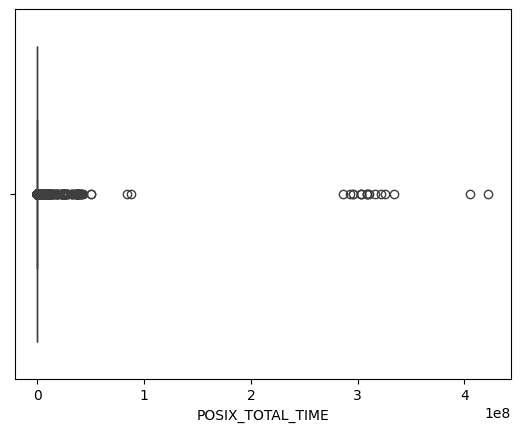

In [13]:
sns.boxplot(x=df_no_outliers.POSIX_TOTAL_TIME)

In [14]:
df_no_outliers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,820701.0,4.103500e+05,2.369161e+05,0.000000e+00,205175.000000,410350.00000,6.155250e+05,8.207000e+05
POSIX_OPENS,820701.0,2.733072e+04,8.899390e+05,0.000000e+00,215.000000,5543.00000,1.695400e+04,5.531094e+08
POSIX_FILENOS,820701.0,-1.680470e+03,2.904335e+04,-3.933124e+06,-994.000000,-288.00000,-2.000000e+01,-1.000000e+00
POSIX_DUPS,820701.0,-1.680470e+03,2.904335e+04,-3.933124e+06,-994.000000,-288.00000,-2.000000e+01,-1.000000e+00
POSIX_READS,820701.0,2.458676e+06,7.862124e+07,0.000000e+00,27281.000000,249379.00000,1.558014e+06,2.237846e+10
...,...,...,...,...,...,...,...,...
POSIX_TOTAL_TIME,820701.0,1.582663e+04,1.513705e+06,1.096725e-05,7.952037,44.37264,1.821327e+02,4.223457e+08
nprocs,820701.0,1.673966e+02,2.328638e+03,1.000000e+00,16.000000,48.00000,6.400000e+01,4.298240e+05
lustre,820701.0,9.884440e-01,1.068759e-01,0.000000e+00,1.000000,1.00000,1.000000e+00,1.000000e+00
error,820701.0,2.060486e-15,3.249293e+03,-1.855642e+06,0.000000,0.00000,0.000000e+00,1.855642e+06


In [15]:
bytes_read_copy = df_no_outliers.POSIX_BYTES_READ.copy().where(df_no_outliers.POSIX_BYTES_READ > 0,0.1)
bytes_written_copy = df_no_outliers.POSIX_BYTES_WRITTEN.copy().where(df_no_outliers.POSIX_BYTES_WRITTEN > 0,0.1)

In [16]:
def plot_df_w_filter(df,filterexp,x_column,coord,color_column="POSIX_BYTES_READ"):
    df[filterexp].plot.scatter(x=x_column,y="POSIX_TOTAL_TIME", ax=coord,
                                                 c=np.log10(bytes_read_copy[filterexp]),colorbar=True)

In [17]:
def plot_mosaic(filter_spec):
    fig, axs = plt.subplots(nrows = 3, ncols=3, figsize=(30, 20))
    plot_df_w_filter(df_no_outliers,filter_spec,"nprocs",axs[0,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_READS",axs[0,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_CONSEC_READS",axs[0,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_WRITES",axs[1,0],"POSIX_BYTES_WRITTEN")
    df_no_outliers[filter_spec].plot.scatter(x="POSIX_BYTES_READ",y="POSIX_TOTAL_TIME",ax=axs[1,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_STRIDE1_STRIDE",axs[1,2])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_STRIDE2_STRIDE",axs[2,0])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_STRIDE3_STRIDE",axs[2,1])
    plot_df_w_filter(df_no_outliers,filter_spec,"POSIX_STRIDE4_STRIDE",axs[2,2])
    plt.show()

In [18]:
most_used_apps[0:20]

Index(['SpEC', 'CCTM_v52_Linux2_x86_64intel', 'mosst_dynamo.x', 'vasp_gam',
       'Spells', 'pw.x', 'enzo.exe', 'ApplyObservers', 'flash4', 'scheduler.x',
       'lmp_new', 'ior', 'caliop', 'mdtest', 'sord-mO', 'PIOL-FFD', 'Hsigma',
       'nwchem', 'nek5000', 'h_r_f'],
      dtype='object', name='exe')

In [19]:
df_no_outliers[df_no_outliers.path == "Spells"].describe()

,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,error,mean
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


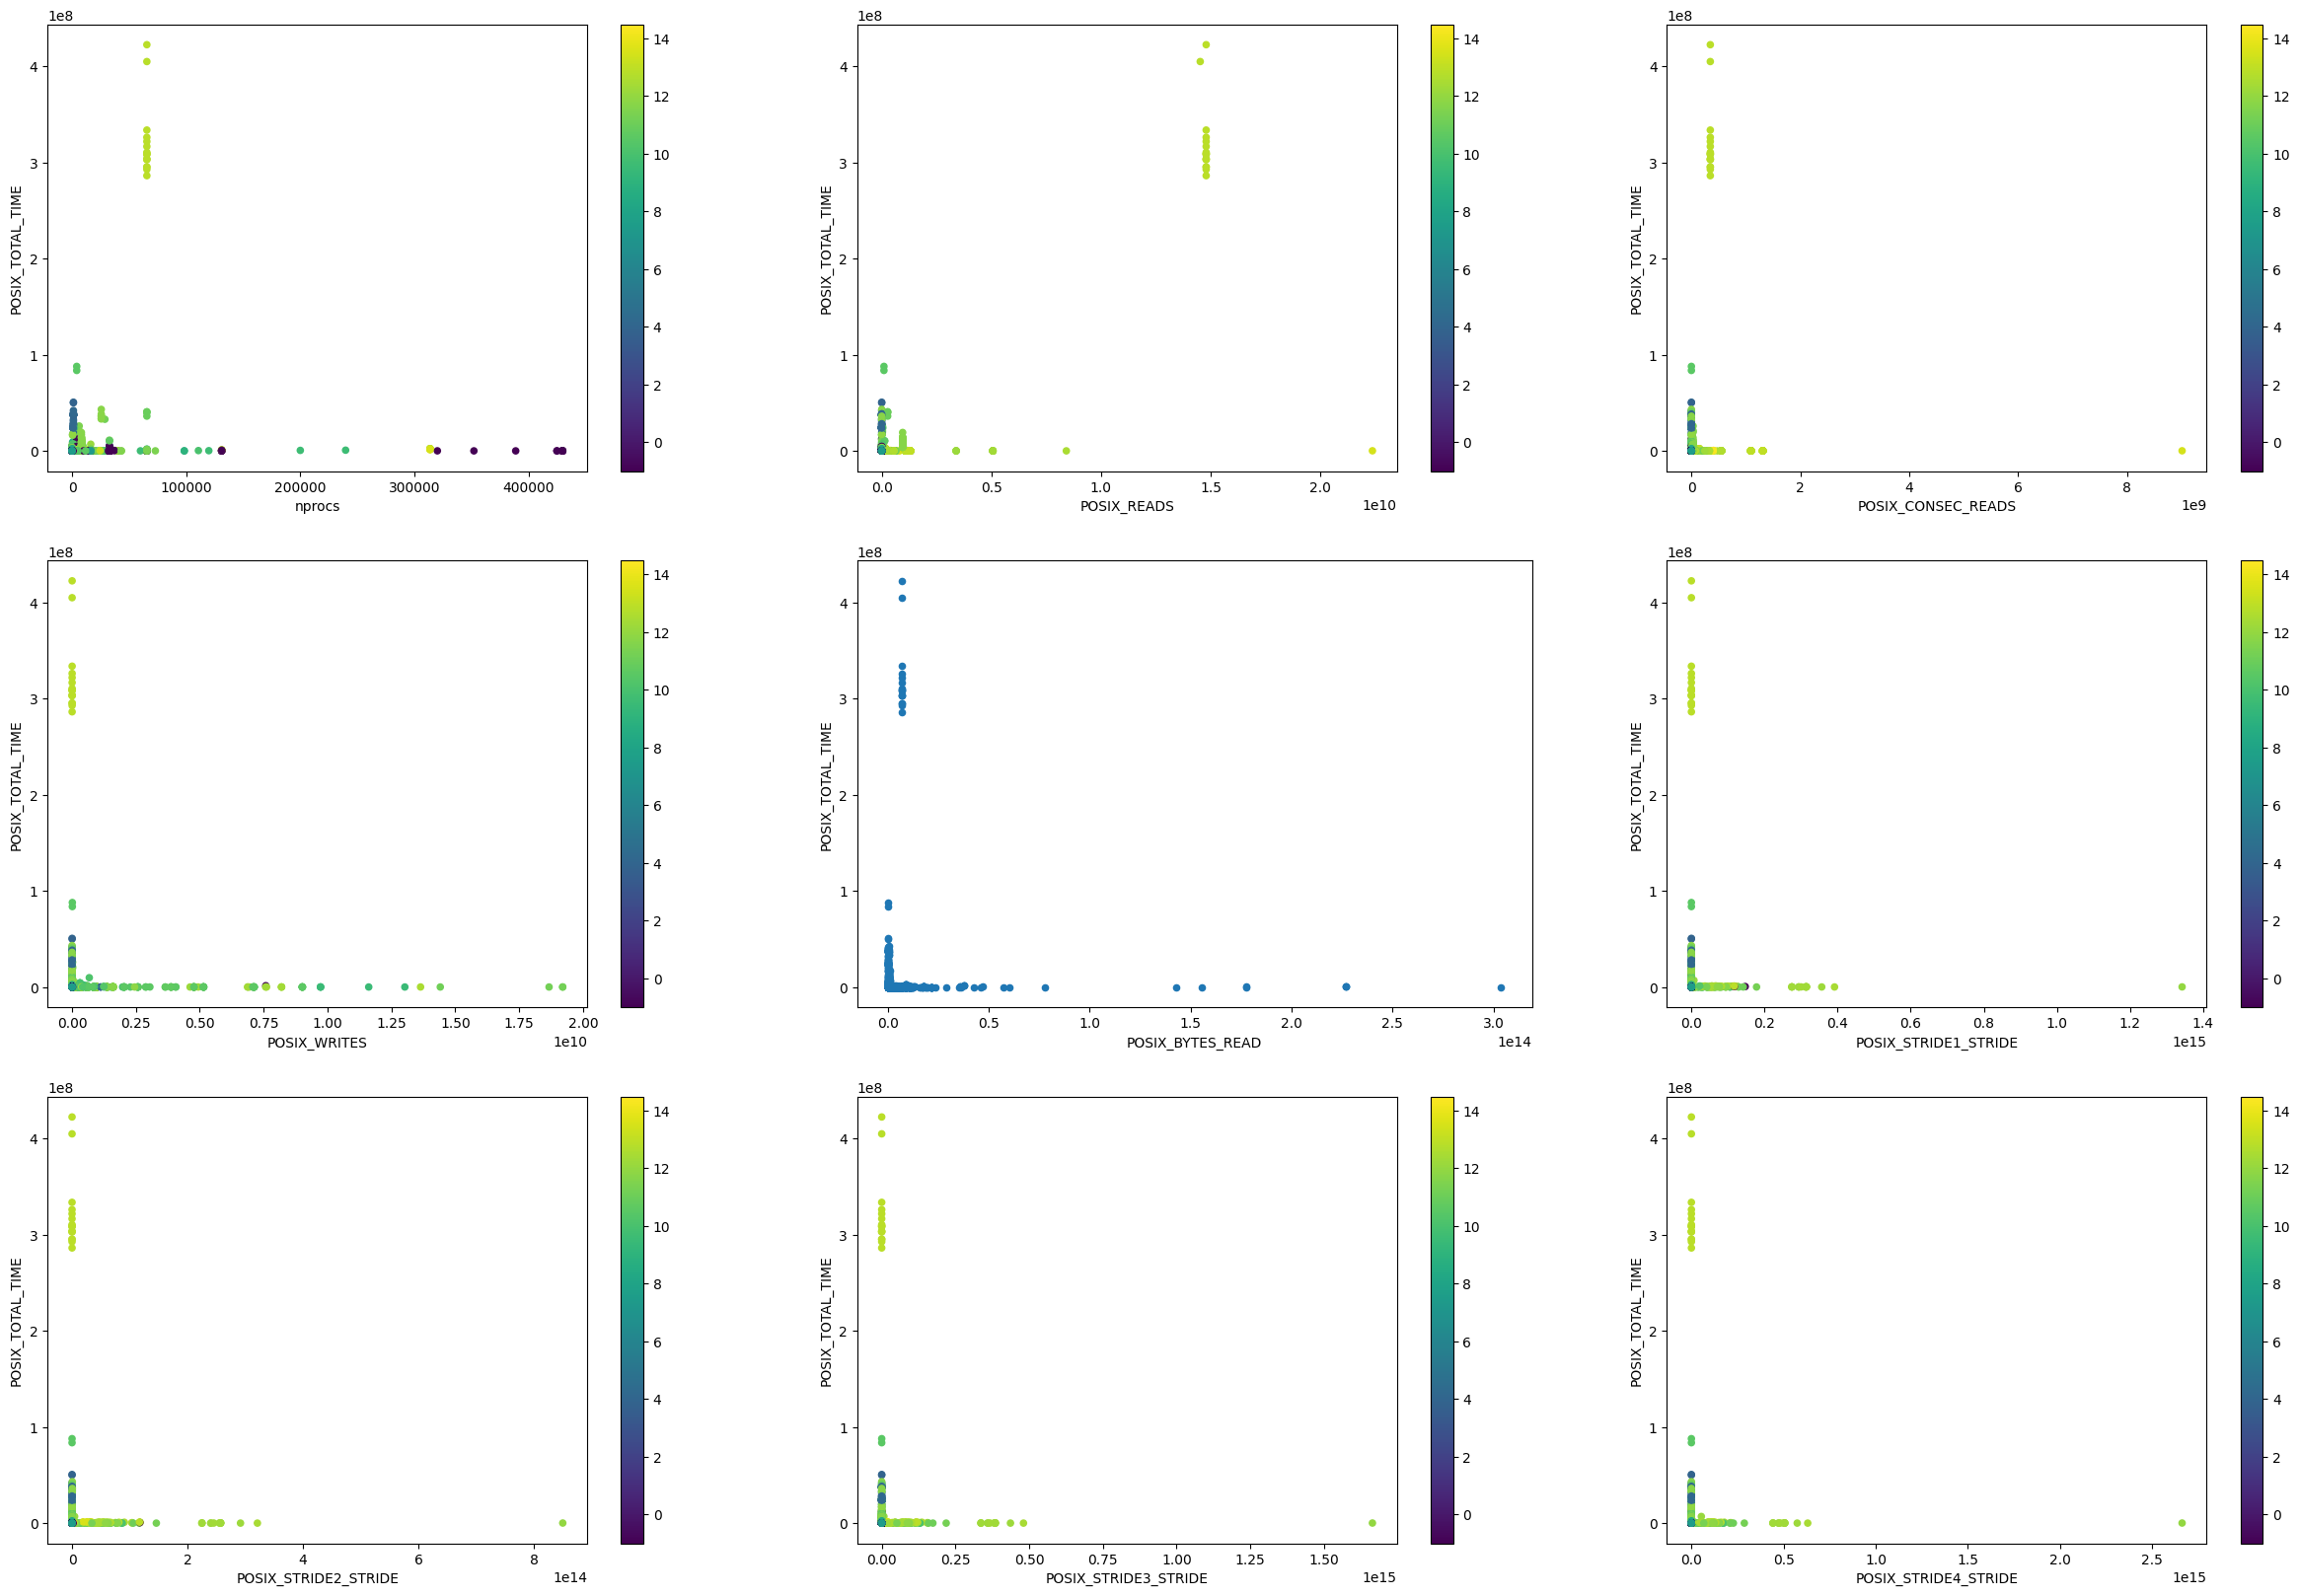

In [20]:
filter_spec = df_no_outliers.exe.isin(most_used_apps[0:5])
plot_mosaic(filter_spec == False)

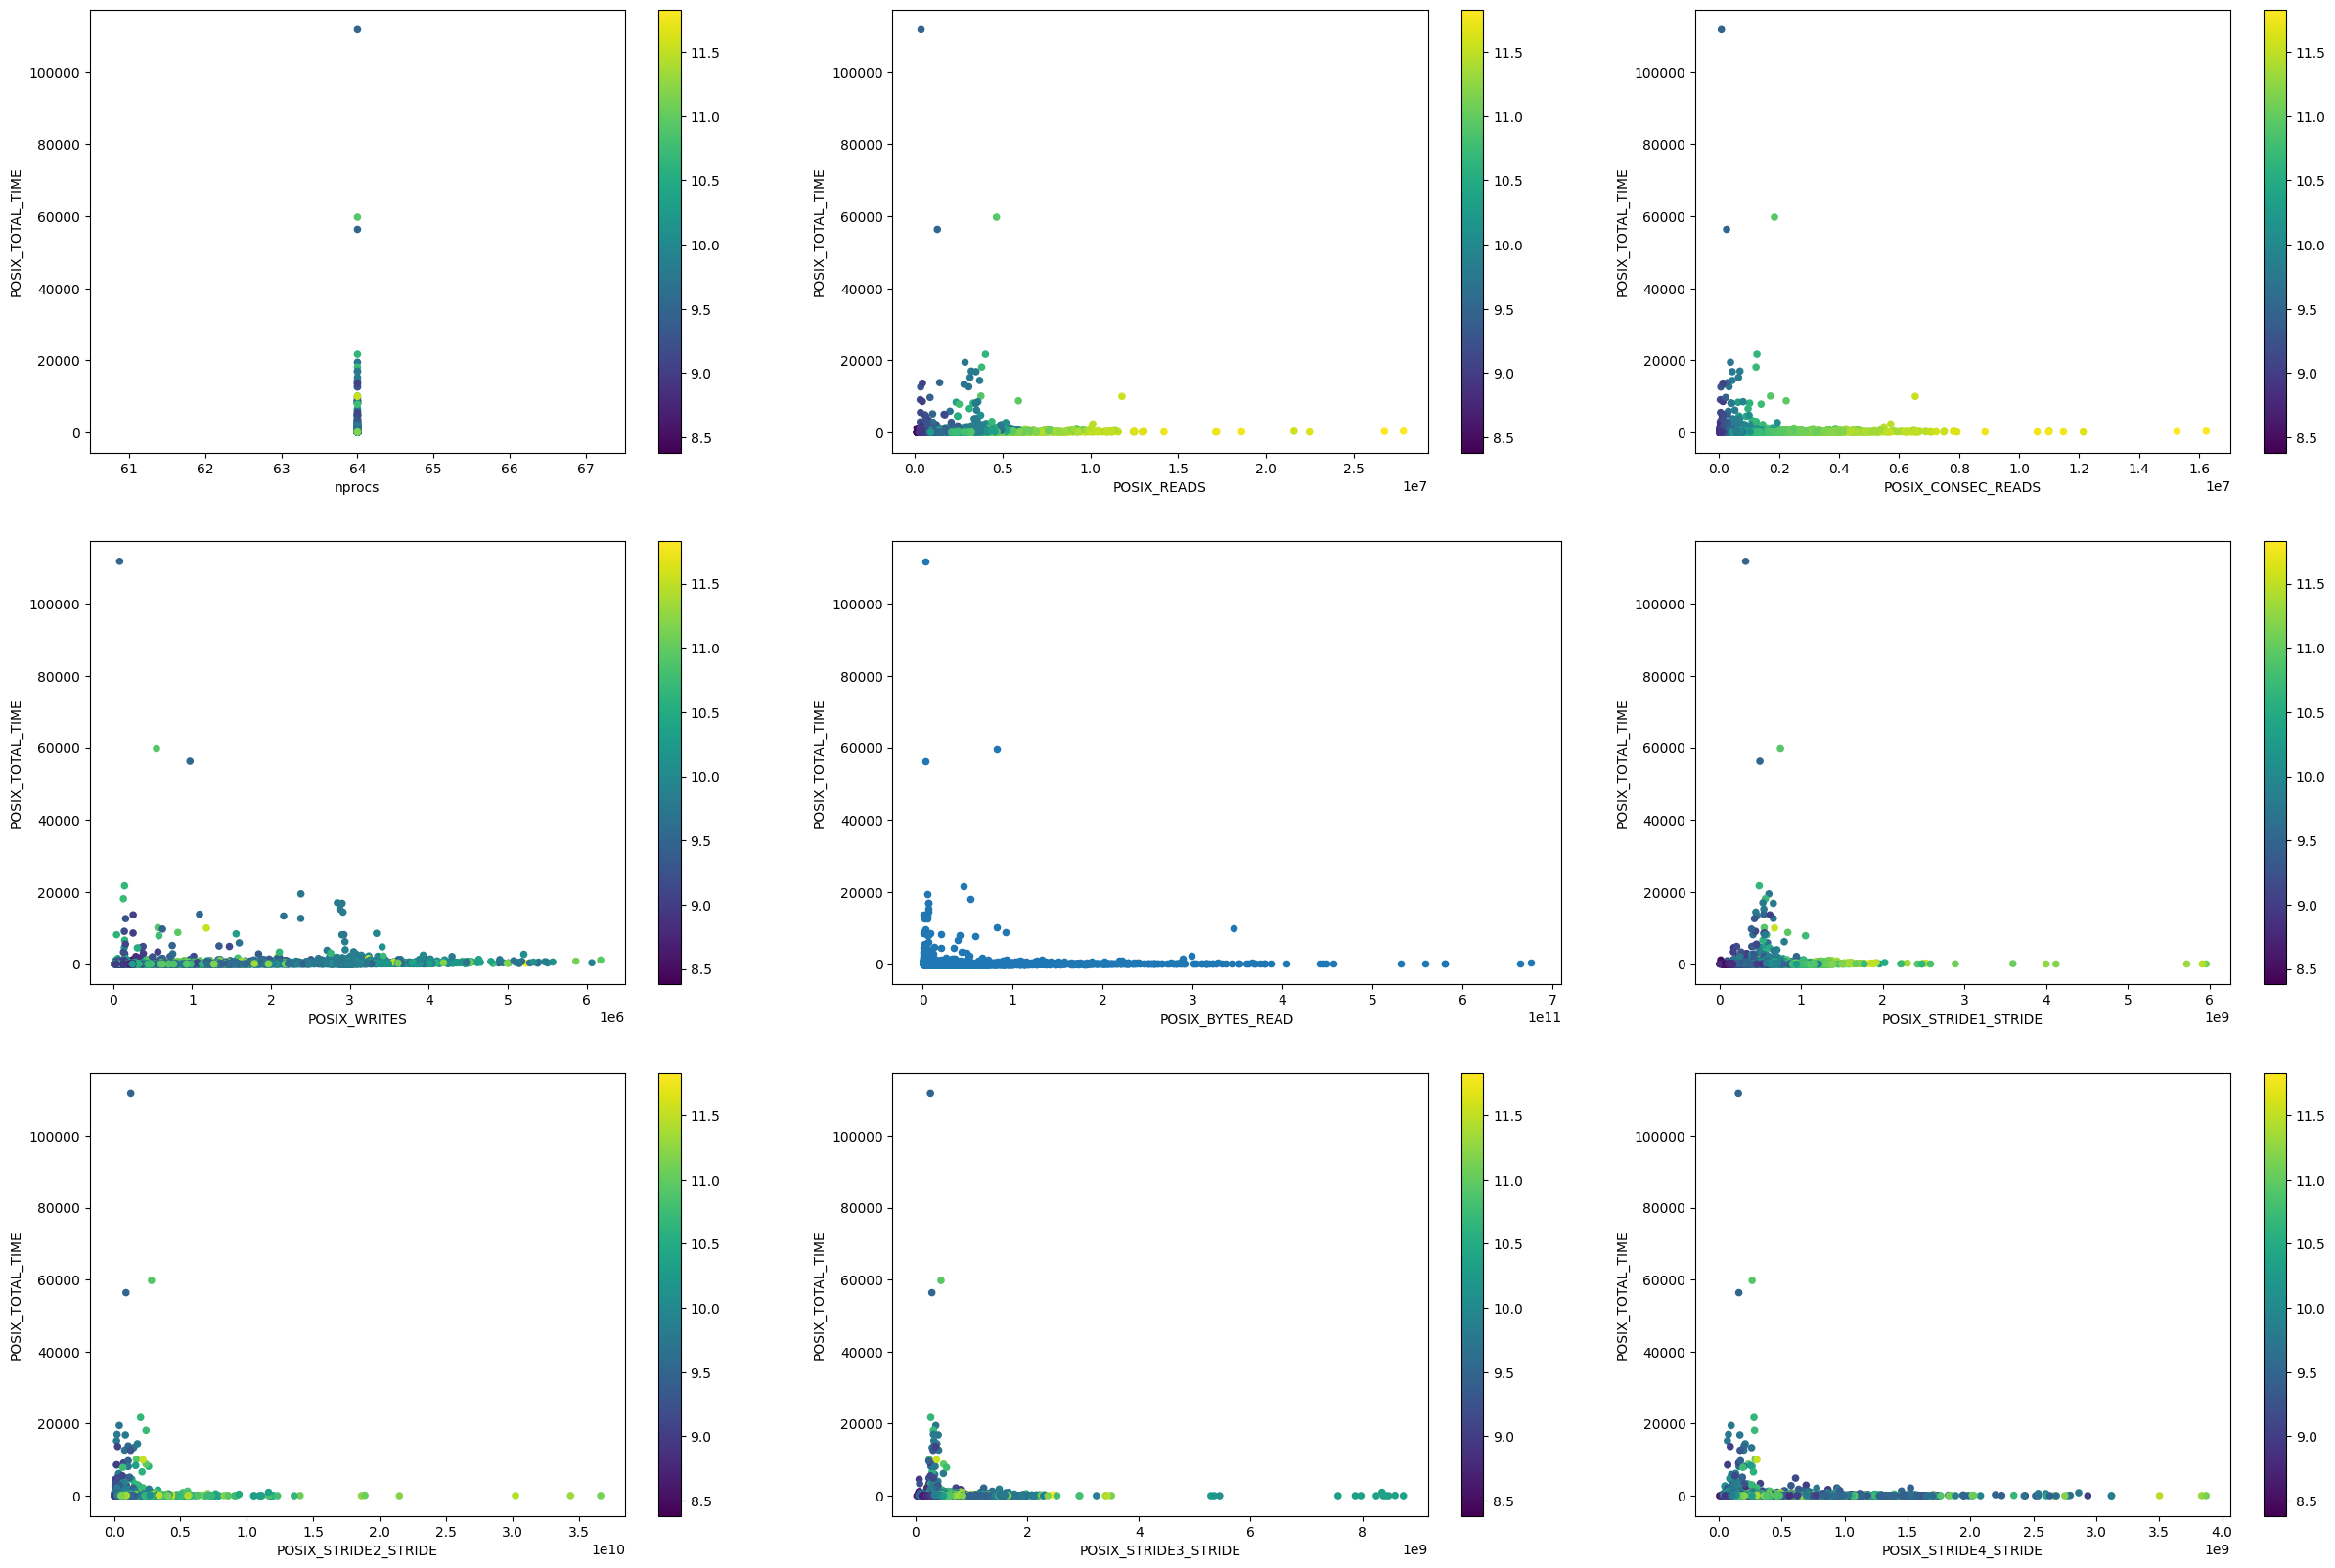

In [21]:
filter_spec = (df_no_outliers.exe == "SpEC") & (df_no_outliers.nprocs == 64)
plot_mosaic(filter_spec == True)

In [22]:
df_no_outliers[(df_no_outliers.exe == "SpEC") & (df_no_outliers.POSIX_TOTAL_TIME > 600000)]

,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,exe,lustre,path,error,mean
20620,20620,4830,-750,-750,228452,143300,210683,15997,0,1,...,0,0,-1,825327.534782,48,SpEC,1,/hpcwork/noco0056/io_transfer_learning/data/bl...,0.0,NaN


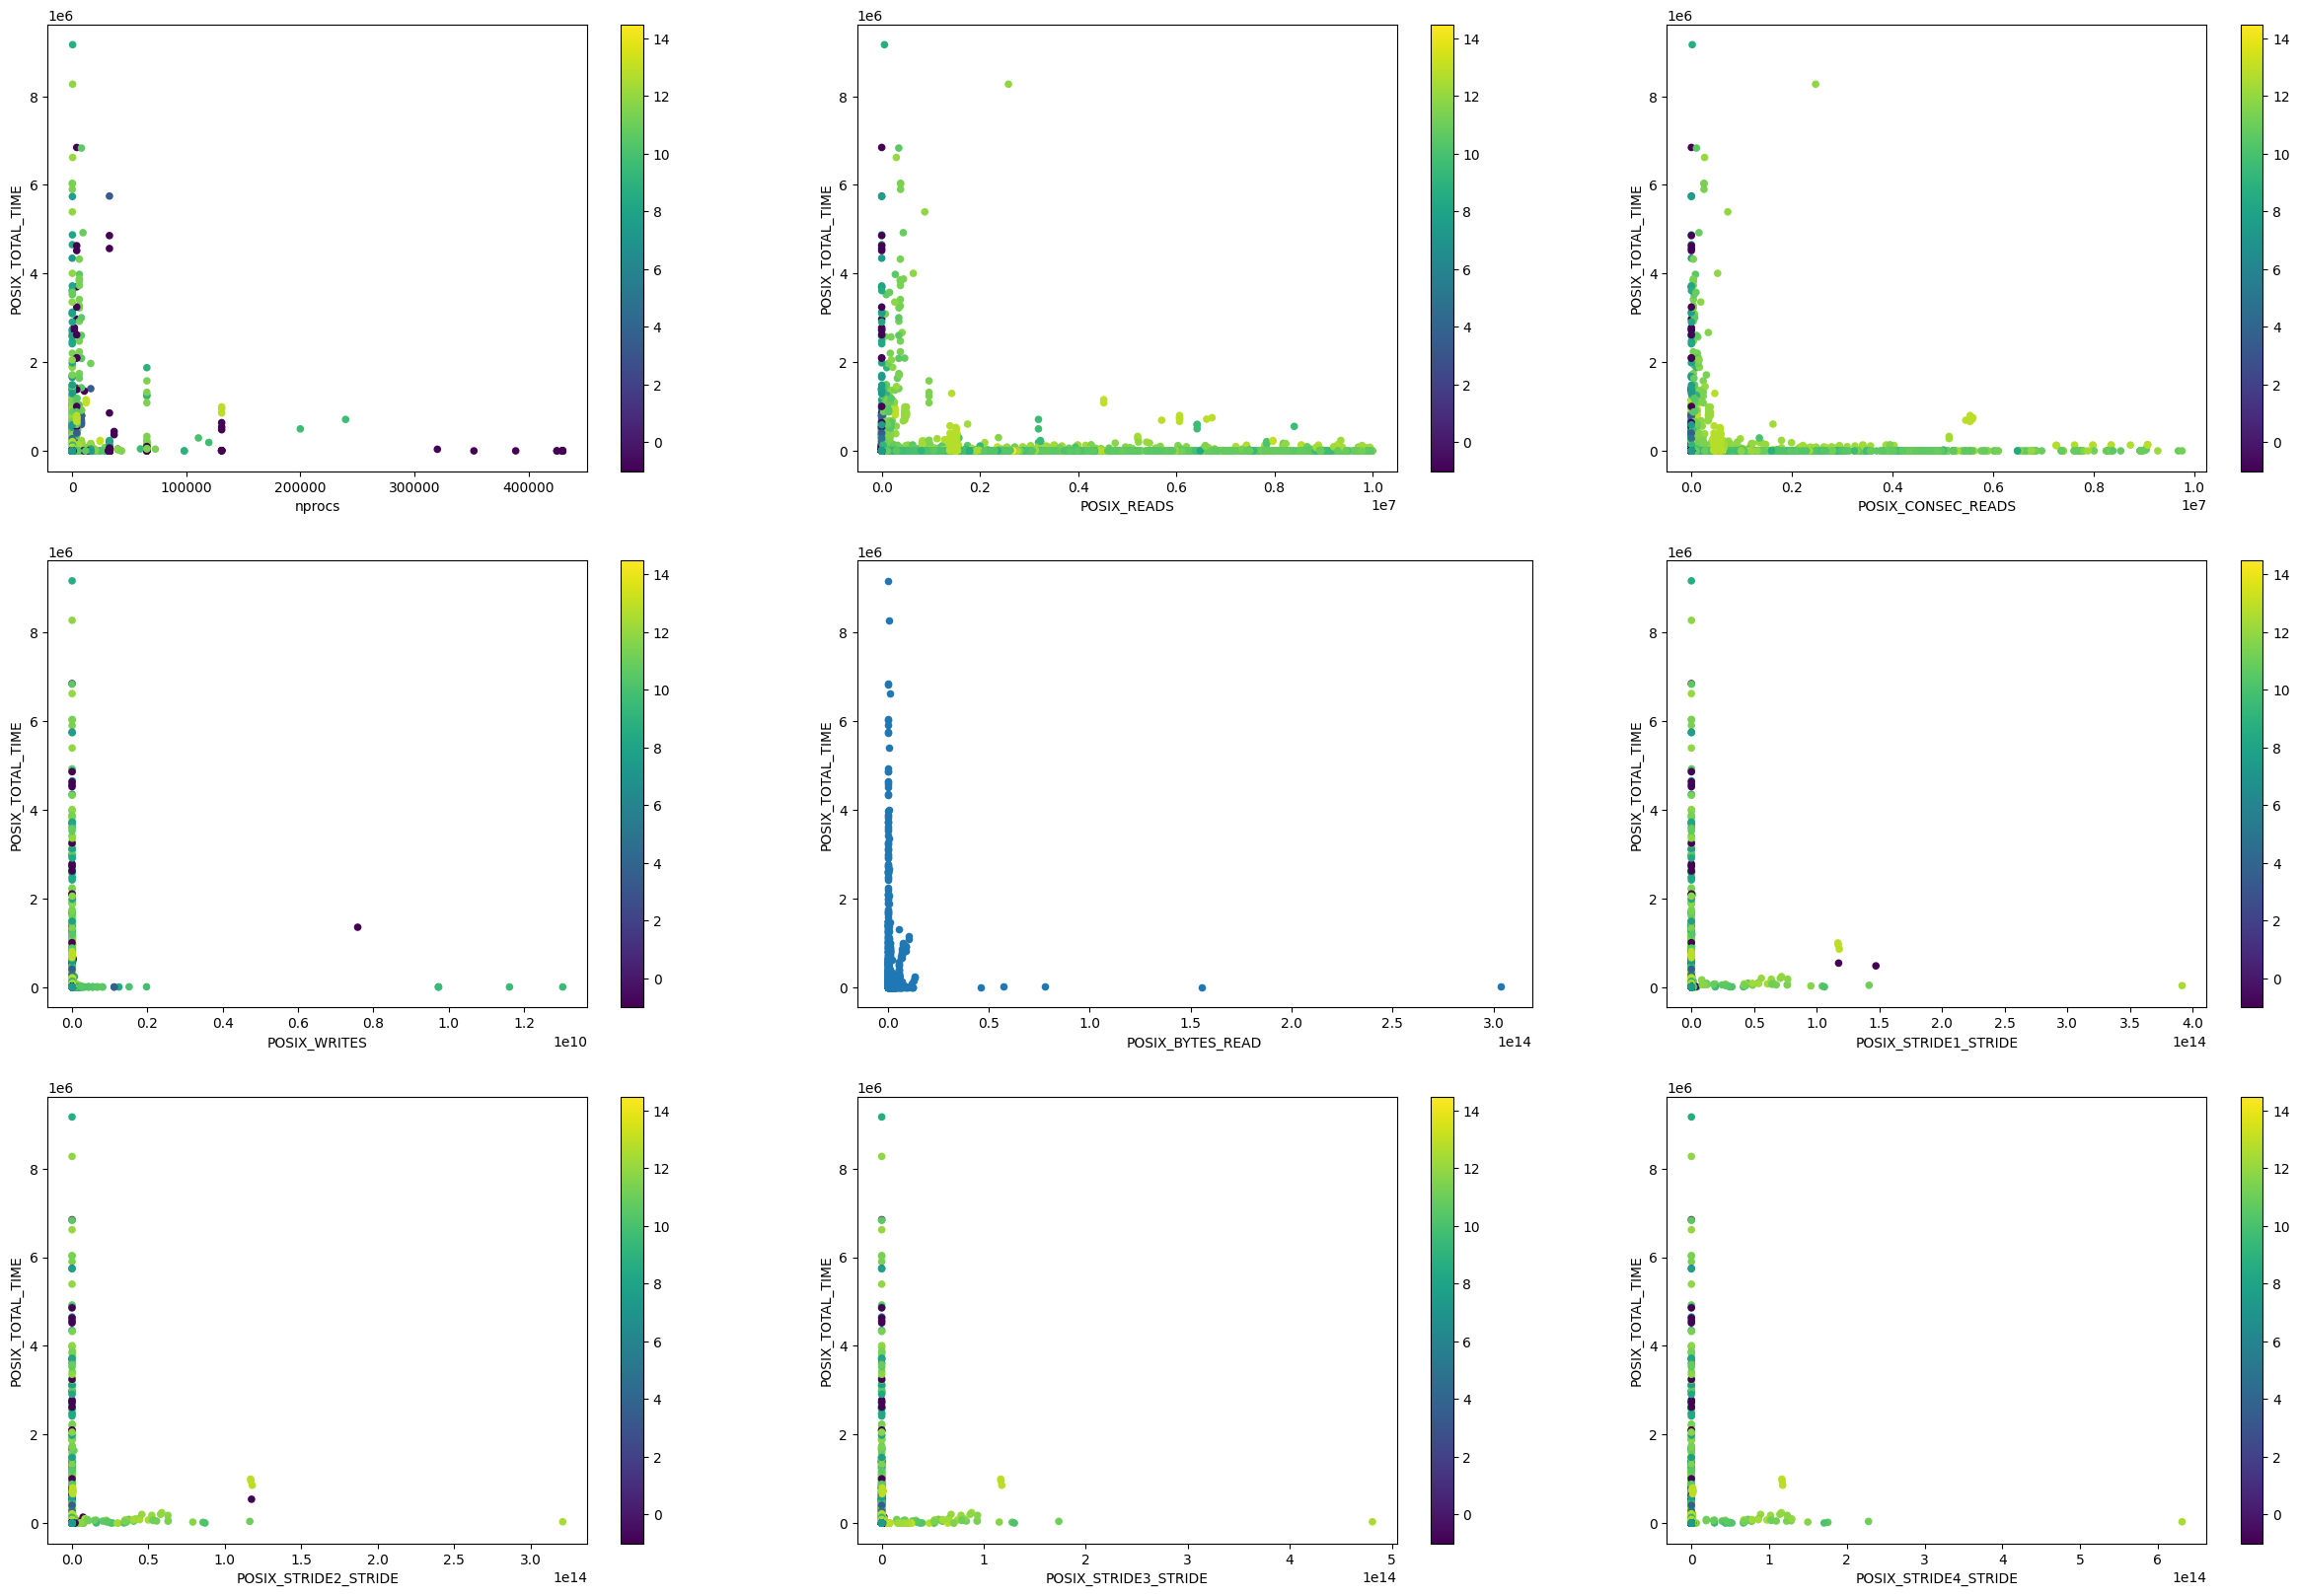

In [23]:
filter_spec = (df_no_outliers.exe == "SpEC") | (df_no_outliers.POSIX_TOTAL_TIME >= 1e7) | (df_no_outliers.POSIX_READS >= 1e7)
plot_mosaic(filter_spec == False)

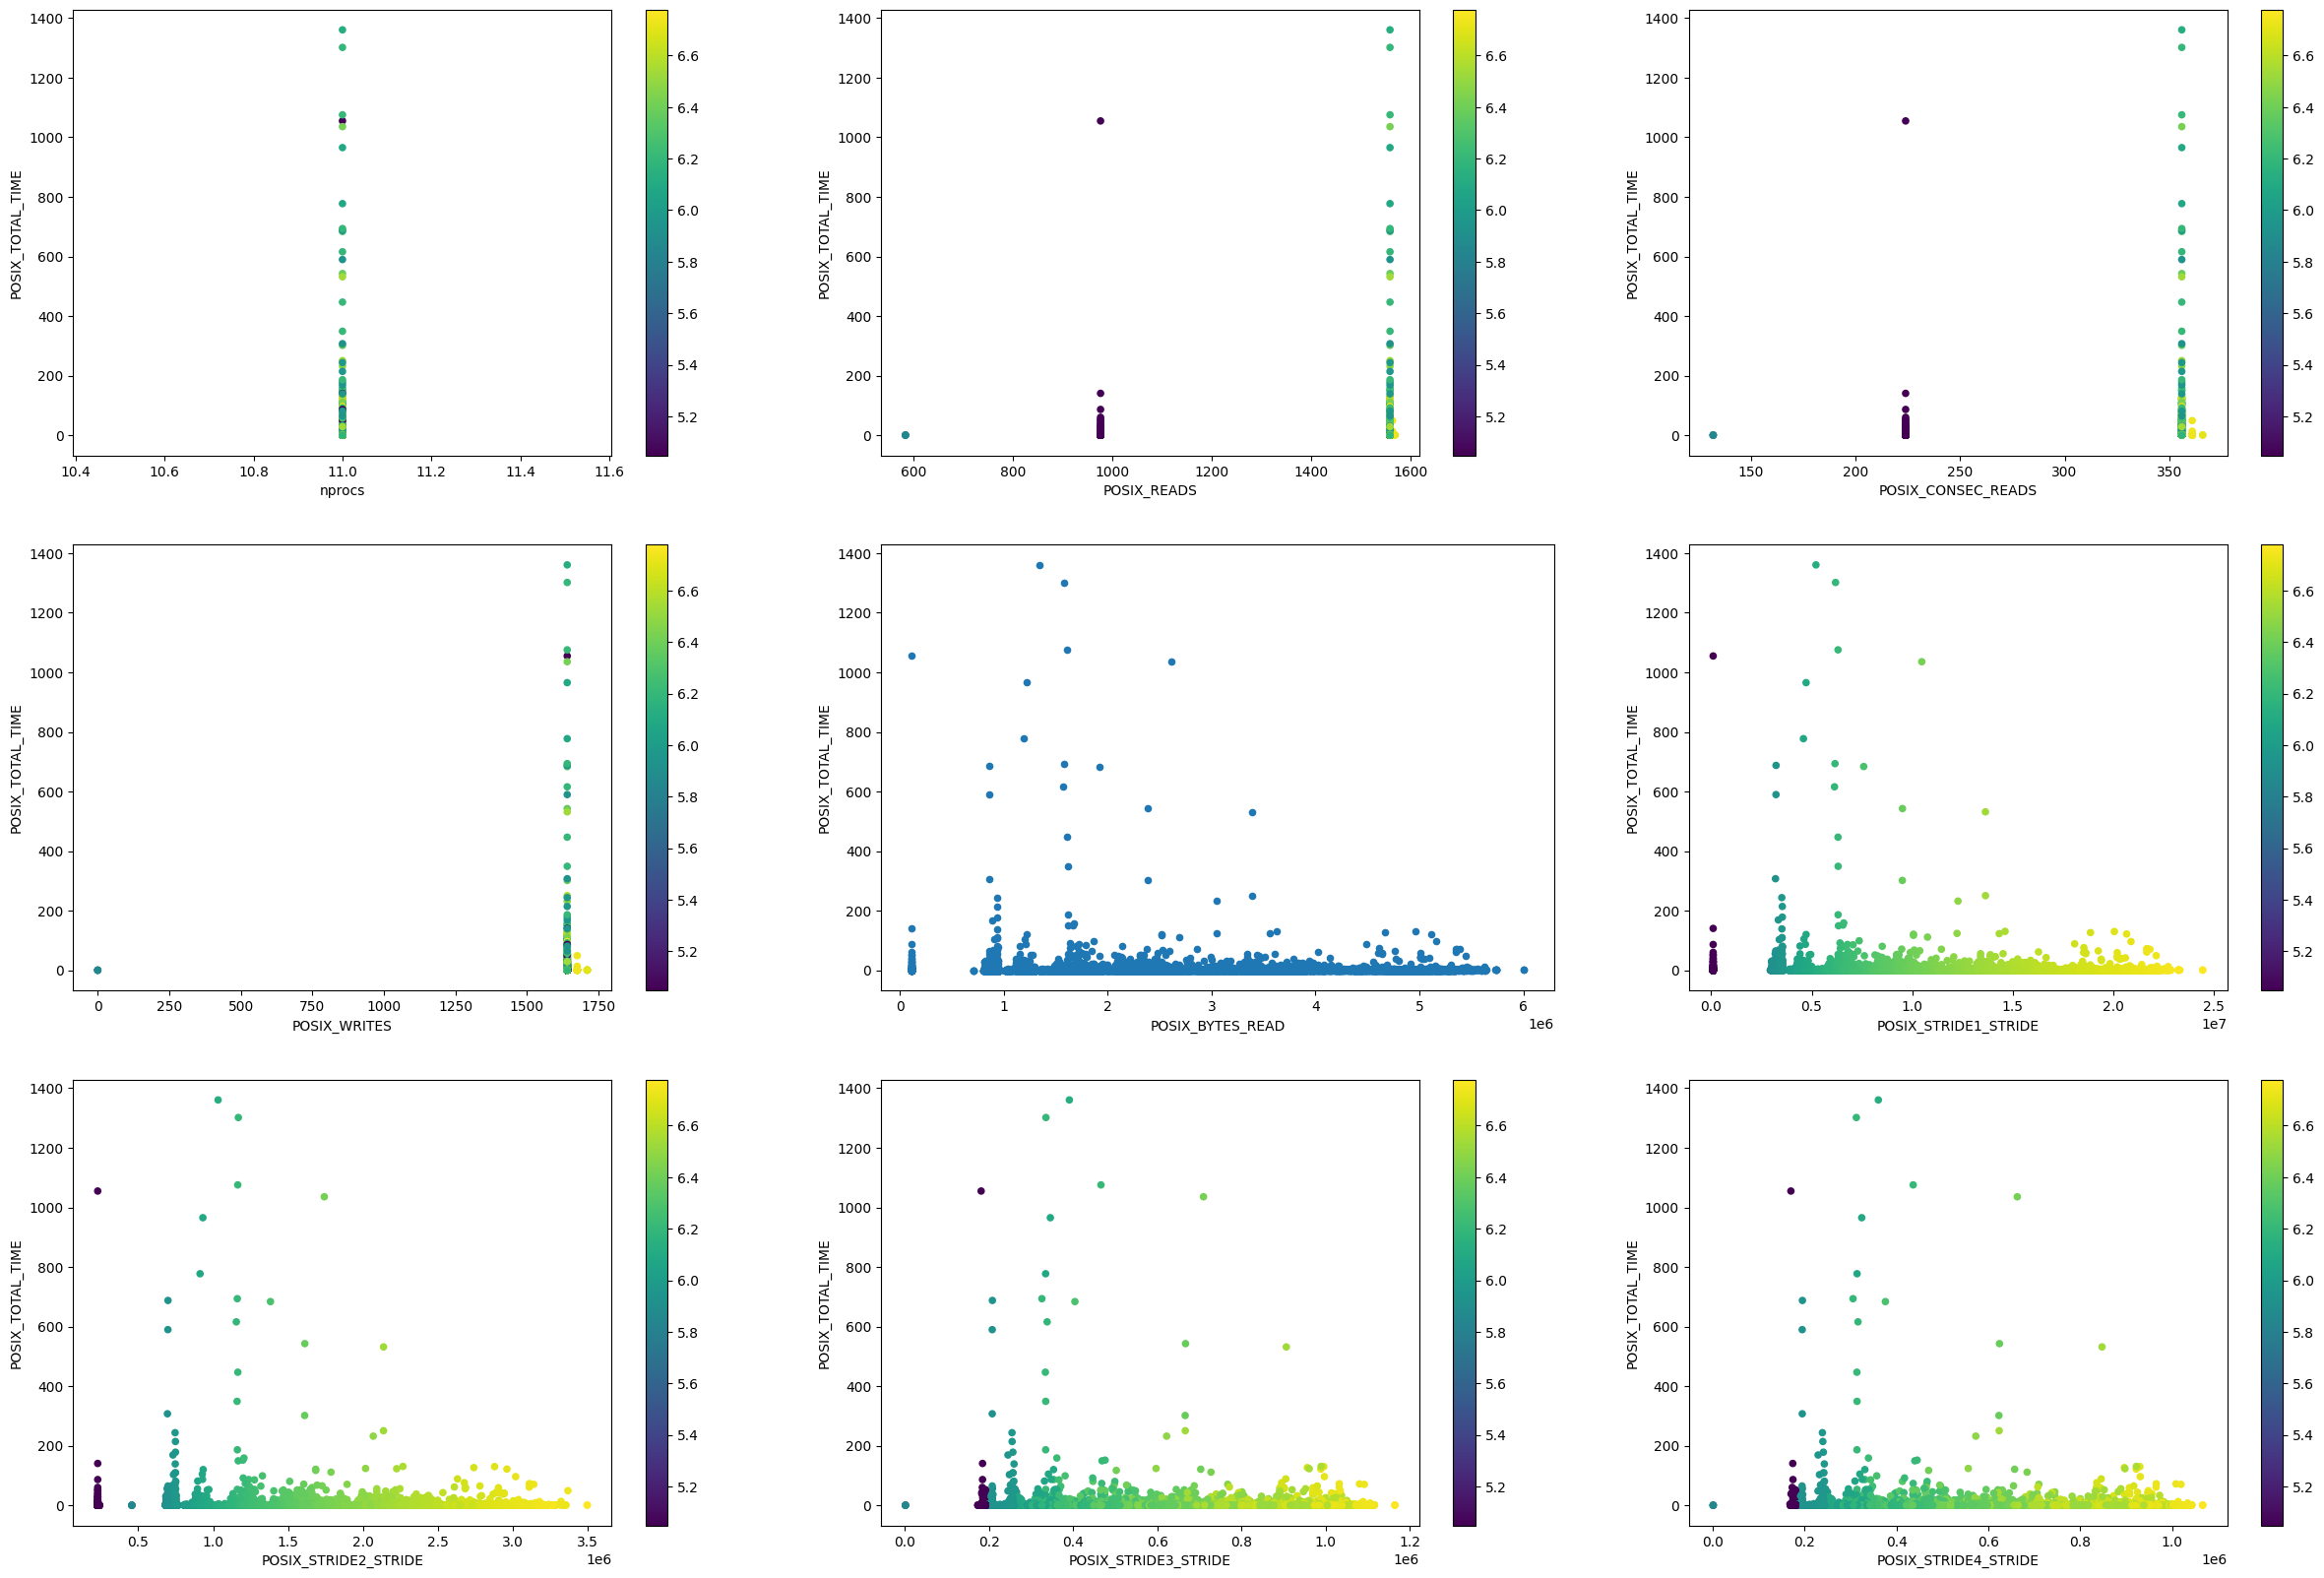

In [24]:
filter_spec = (df_no_outliers.exe == "Spells")
plot_mosaic(filter_spec == True)

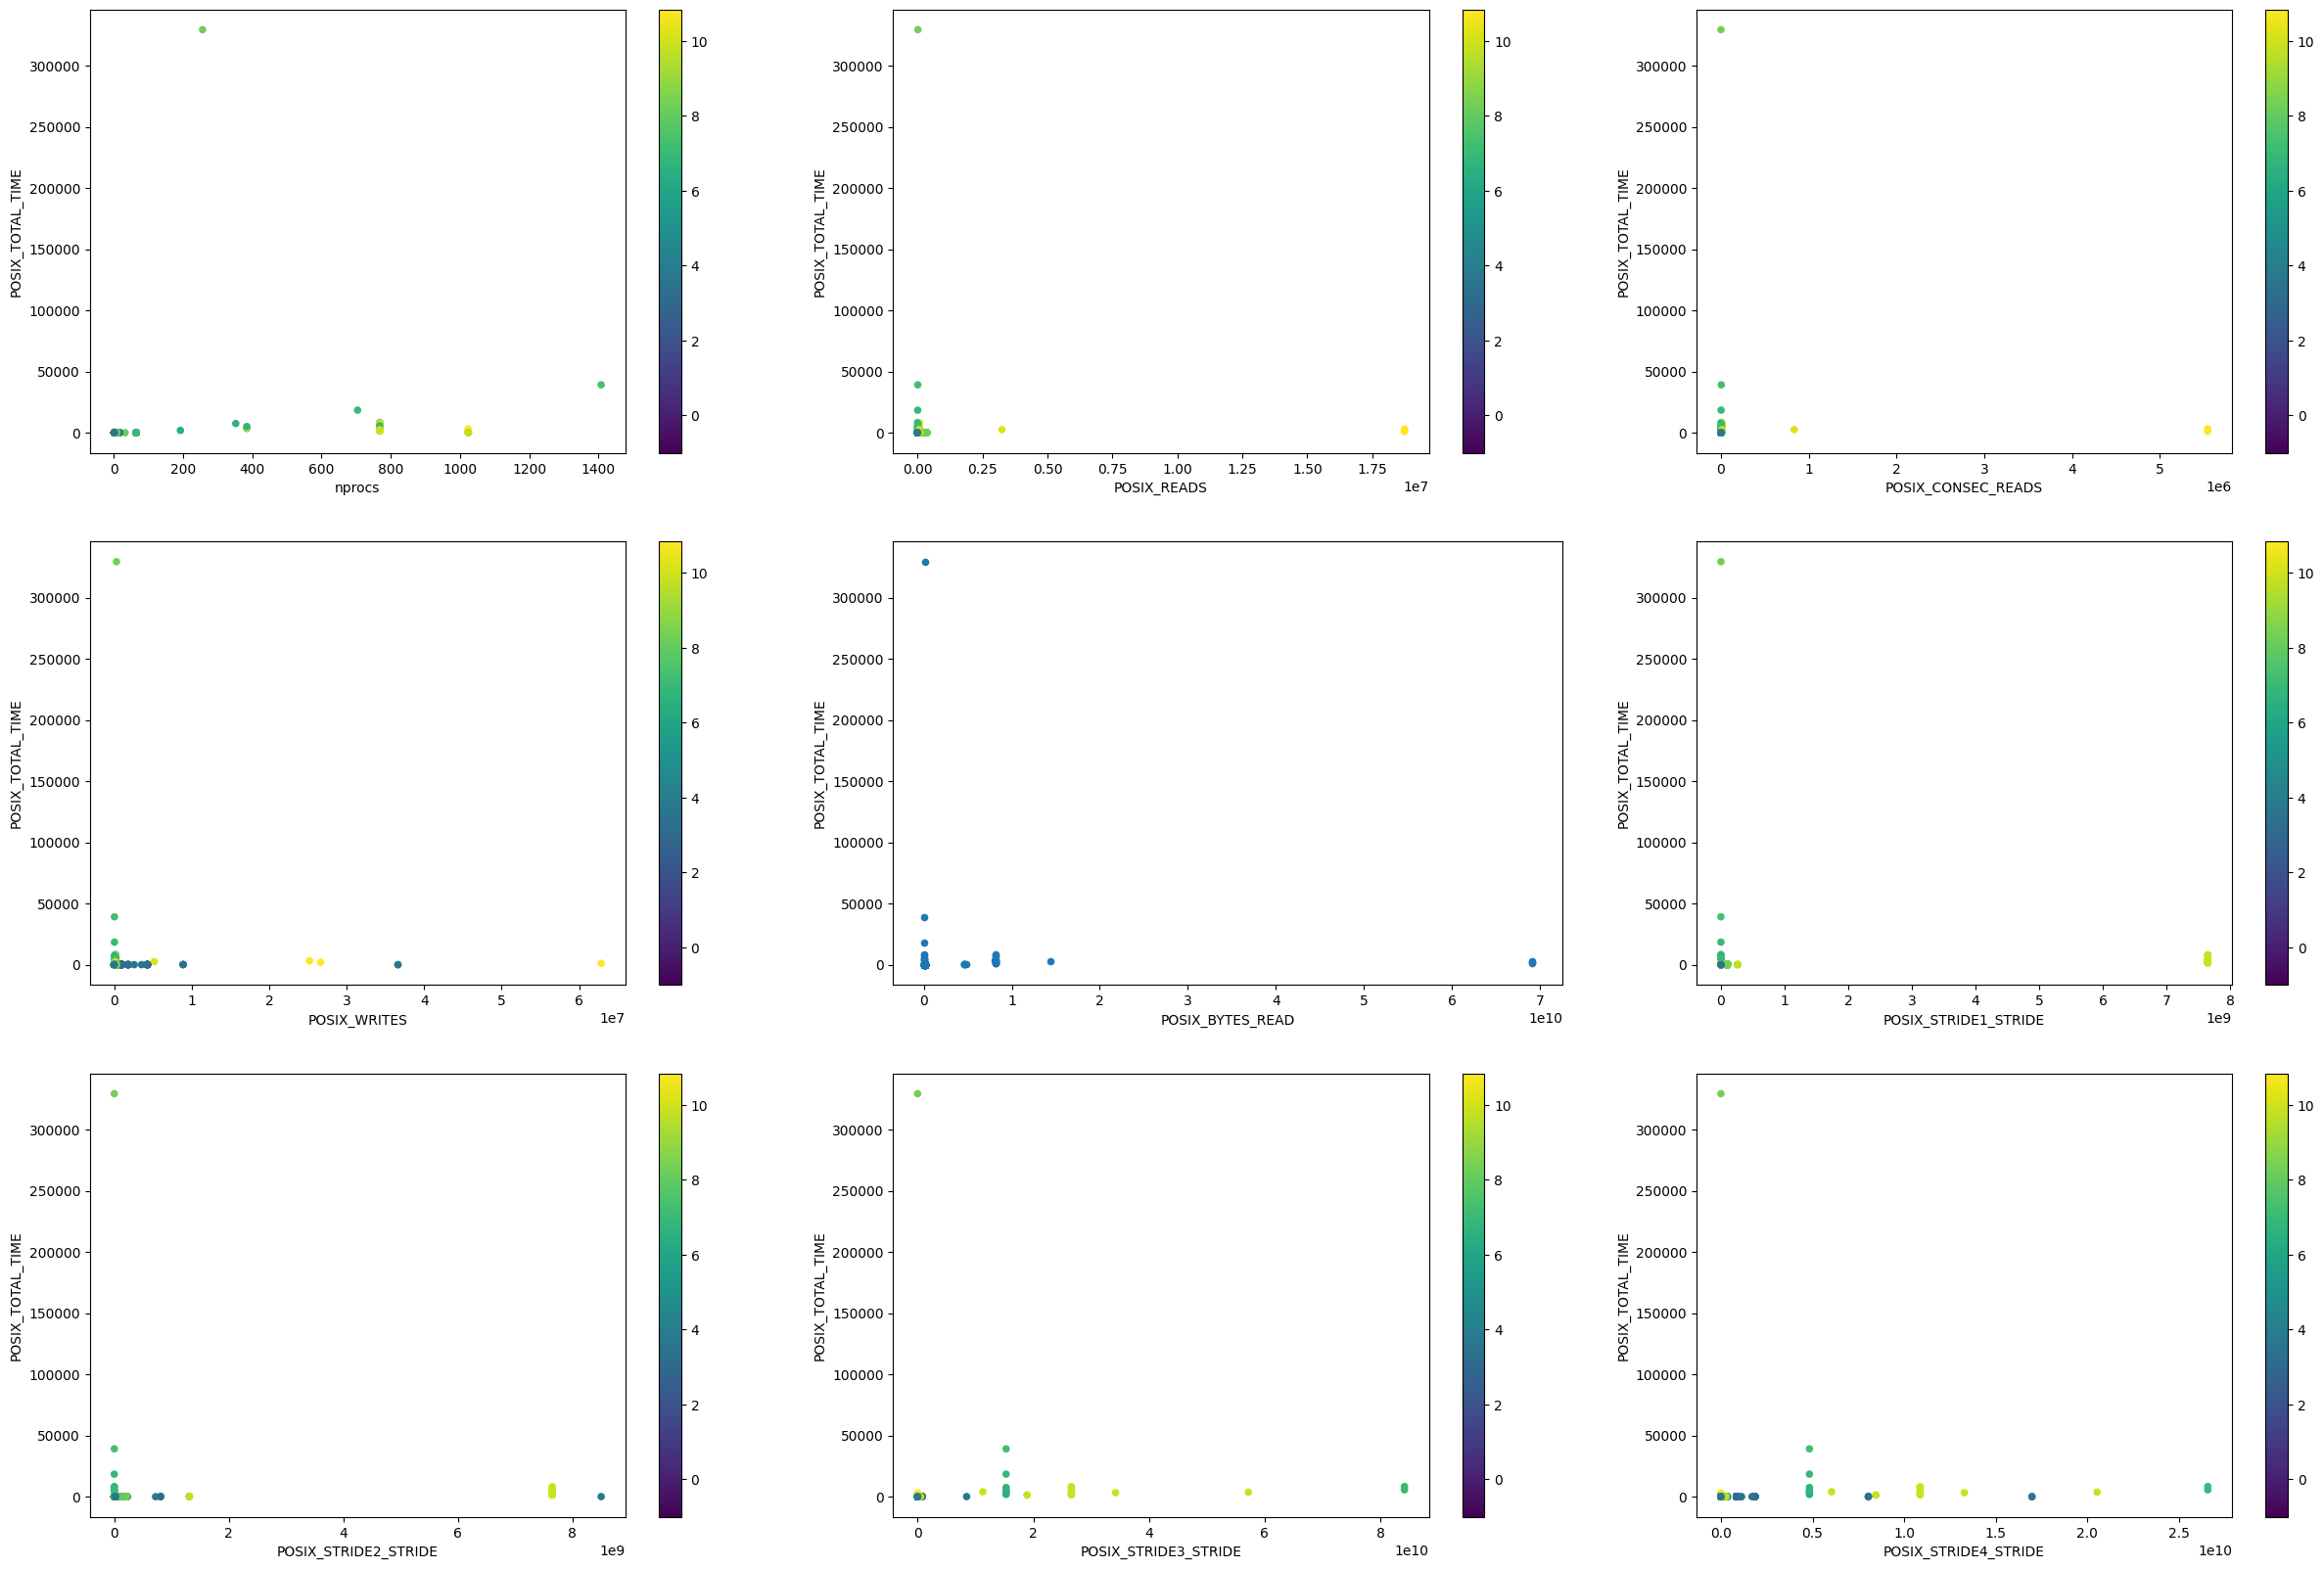

In [25]:
filter_spec = (df_no_outliers.exe == "flash4")
plot_mosaic(filter_spec == True)

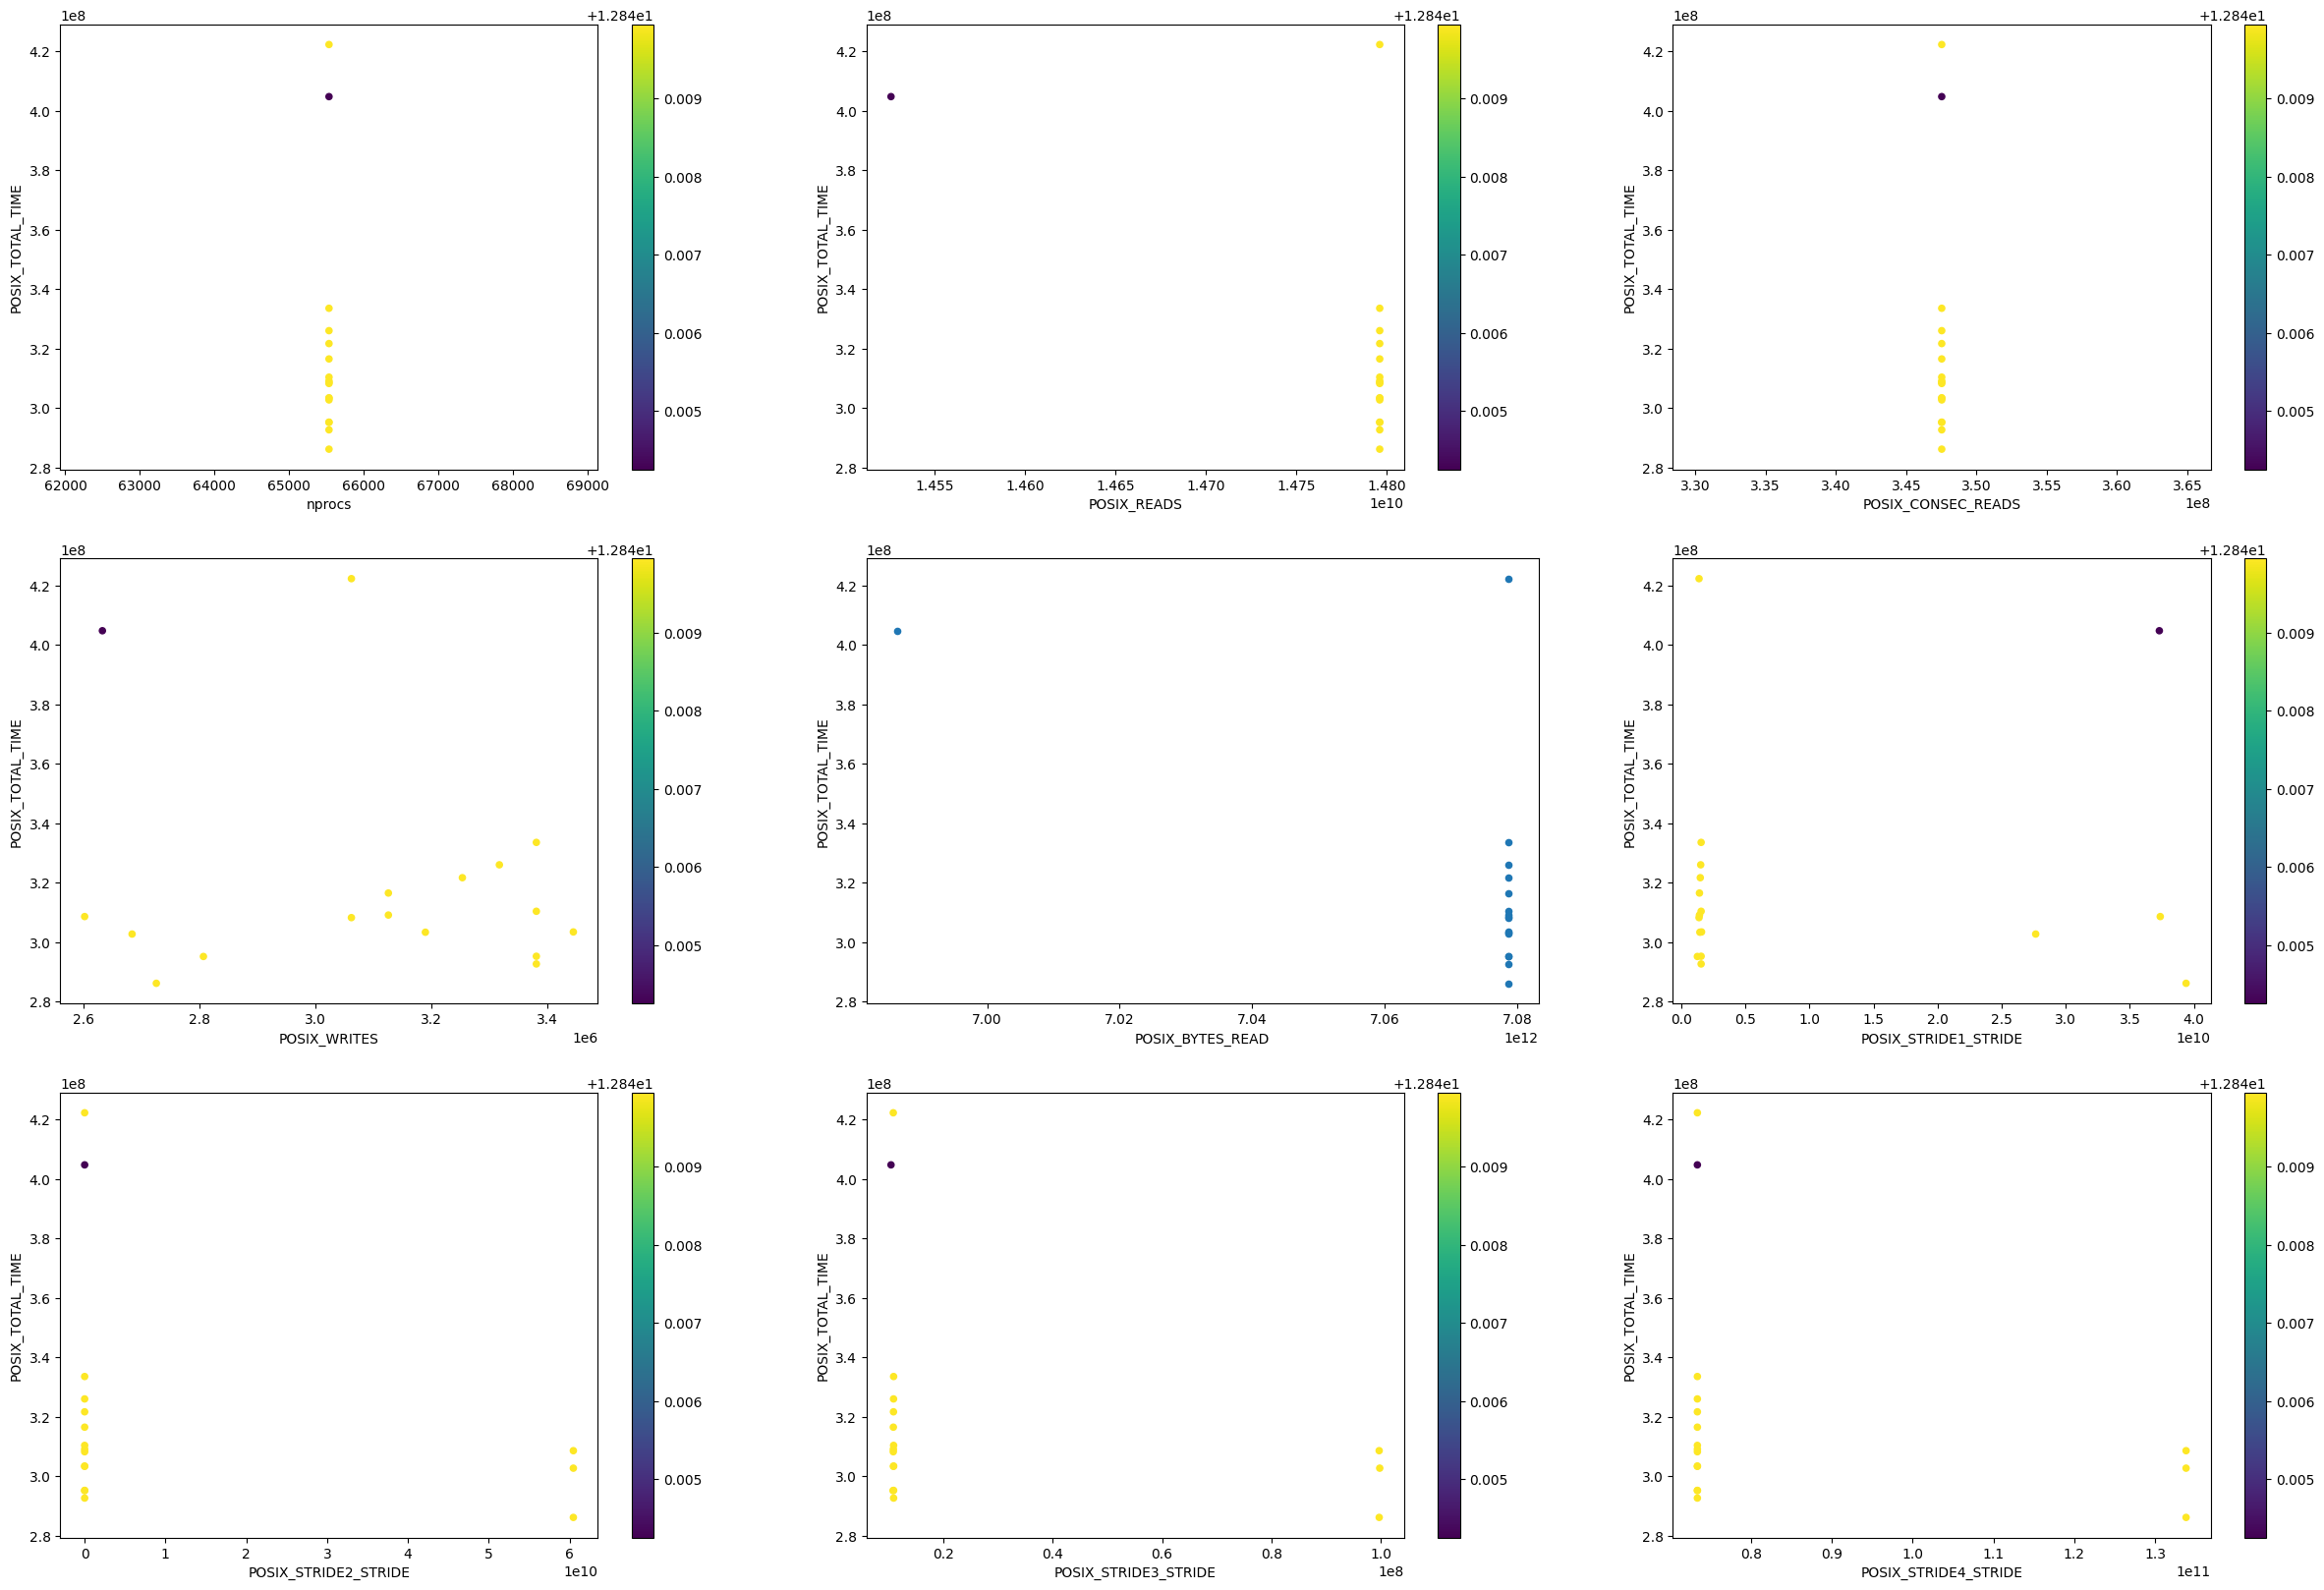

In [26]:
filter_spec = (df_no_outliers.POSIX_TOTAL_TIME > 1e8)
plot_mosaic(filter_spec == True)

In at least 30% of the rows the rank is 0 or -1, possibly not known?

In [29]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == -1]) / len(df_no_outliers)

0.6054141520480663

In [30]:
len(df_no_outliers["rank"][df_no_outliers["rank"] == 0]) / len(df_no_outliers)

0.281940682416617

<Axes: >

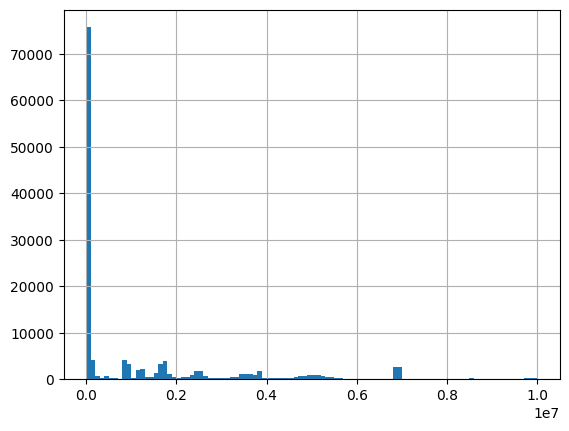

In [31]:
df_no_outliers.POSIX_BYTES_READ[df_no_outliers.POSIX_BYTES_READ < 1e7].hist(bins=100)

In [32]:
count, division = np.histogram(df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ,bins=10,range=(0,1e6))
division[-1] = df_no_outliers.POSIX_BYTES_READ.max() + 1
division

array([0.00000000e+00, 1.00000000e+05, 2.00000000e+05, 3.00000000e+05,
       4.00000000e+05, 5.00000000e+05, 6.00000000e+05, 7.00000000e+05,
       8.00000000e+05, 9.00000000e+05, 3.03845595e+14])

In [33]:
count

array([75751,  4061,   738,   146,   749,   258,   135,    56,  4108,
        3299], dtype=int64)

In [34]:
len(count[count == 0])

0

In [35]:
count.sum() / len(df_no_outliers)

0.10881063871007833

In [36]:
division / df_no_outliers.POSIX_BYTES_READ.max()

array([0.00000000e+00, 3.29114530e-10, 6.58229060e-10, 9.87343589e-10,
       1.31645812e-09, 1.64557265e-09, 1.97468718e-09, 2.30380171e-09,
       2.63291624e-09, 2.96203077e-09, 1.00000000e+00])

In [37]:
df_no_outliers.iloc[0].POSIX_BYTES_READ

899036

In [38]:
elem = df_no_outliers.iloc[0].POSIX_BYTES_READ
division[[False] + [elem < division[i] and elem >= division[i-1] for i in range(1,len(division))]][0]

900000.0

In [39]:
alphas = pd.Series.copy(df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ)
alphas = alphas.apply(lambda elem: division[[False] + [elem < division[i] and elem >= division[i-1] for i in range(1,len(division))]][0])

In [40]:
alphas[df_no_outliers[df_no_outliers.POSIX_READS < 1e6].POSIX_BYTES_READ < alphas]

0         9.000000e+05
3         3.038456e+14
11        3.038456e+14
12        3.038456e+14
16        3.038456e+14
              ...     
820693    3.038456e+14
820695    3.038456e+14
820696    3.038456e+14
820697    3.038456e+14
820698    3.038456e+14
Name: POSIX_BYTES_READ, Length: 485452, dtype: float64

In [41]:
len(alphas)

485452